1. Plot a Full-Frame Image:

Download the FITS file containing the FFI:
You can get this fits file using this URL as follows:
filename = "https://archive.stsci.edu/missions/tess/ffi/s0060/2023/004/3-2/tess2023004034201-s0060-3-2-0249-s_ffic.fits"

Plot the image data: 
Use WCS to plot the image on sky-coordinate axes 
This FFI is from Sector 60. Include the sector, along with the camera number and CCD number (look for these in the FITS header!) in the title of the image


In [2]:
filename = "https://archive.stsci.edu/missions/tess/ffi/s0060/2023/004/3-2/tess2023004034201-s0060-3-2-0249-s_ffic.fits"
#fits file for Full Frame Image (FFI)

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm

from astropy.wcs import WCS
from astropy.io import fits
from astropy.table import Table


Filename: C:\Users\Insan\.astropy\cache\download\url\2e3f7b9f169a15f4e57cb92e192d1b58\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  CAMERA.CCD 3.2 cal    1 ImageHDU       183   (2136, 2078)   float32   
  2  CAMERA.CCD 3.2 uncert    1 ImageHDU       183   (2136, 2078)   float32   

HDU 1 image data:
Mean:  124.31987
Median:  79.504364
IQR:  12.943924
Max:  114952.87
Min:  -68.086784
Lower outliers: Q1 - 1.5*IQR =  56.212532
Upper outliers: Q3 + 1.5*IQR =  107.98823


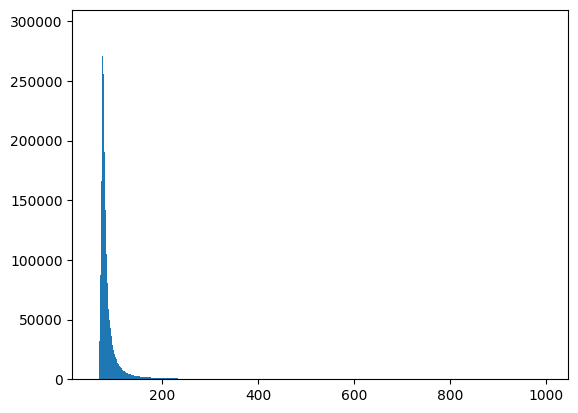

In [4]:
f = fits.open(filename)
f.info()
#HDU 1 seems to be the correct image data because it is called "CAMERA.CCD 3.2 cal" for calibrated
HDU1 = f[1].header
image_data_1 = f[1].data

#analyze the data from first HDU for outliers
print("\nHDU 1 image data:")
print("Mean: ", np.mean(image_data_1)) # ~124
print("Median: ", np.median(image_data_1)) # ~80
print("IQR: ", np.percentile(image_data_1, 75) - np.percentile(image_data_1, 25)) # ~ 13
print("Max: ", np.max(image_data_1)) # ~115000
print("Min: ", np.min(image_data_1)) # ~ -68 ? (not sure why negative values are present)

print("Lower outliers: Q1 - 1.5*IQR = ", np.percentile(image_data_1, 25) - 1.5*(np.percentile(image_data_1, 75) - np.percentile(image_data_1, 25)))
print("Upper outliers: Q3 + 1.5*IQR = ", np.percentile(image_data_1, 75) + 1.5*(np.percentile(image_data_1, 75) - np.percentile(image_data_1, 25)))

#Using the outlier formula, we can see that anything < ~56 and > ~108 is an outlier
#However if you look at the histogram, there us significant data past 108 until about ~300 and the bulk of relavent data starts from ~65
#So I will set my outliers to be <65 and >1000 (these values will be clipped out of our plots using vmin and vmax)

#Using histogram to visualize the data
plt.hist(image_data_1.flatten(), bins=np.linspace(60, 1000, 1000))
plt.show()


Set MJD-END to 59948.159196 from DATE-END'. [astropy.wcs.wcs]


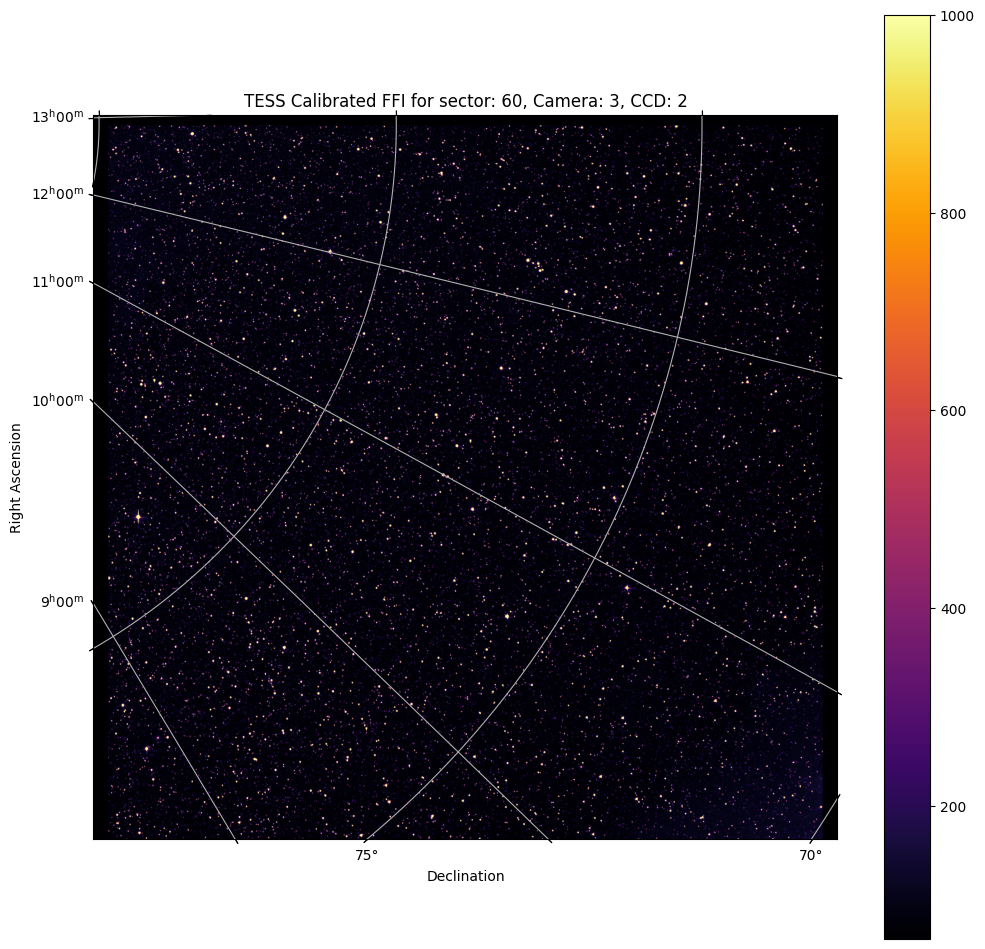

In [5]:
#Using HDU1 data

wcs = WCS(HDU1)

#Get data for plot title
sector = 60 # file name says "s0060"
camera = HDU1['CAMERA']
ccd = HDU1['CCD']

plt.figure(figsize=(12, 12), dpi=100)  # Making the plot a bit larger for viewing comfort

ax = plt.subplot(projection = wcs) # Setting the WCS for the plot

plt.imshow(image_data_1, vmin=65, vmax=1000, cmap=cm.inferno, origin='lower') # Plotting the image data
plt.colorbar()
plt.grid(True)
plt.ylabel('Right Ascension')
plt.xlabel('Declination')
plt.title(f"TESS Calibrated FFI for sector: {str(sector)}, Camera: {str(camera)}, CCD: {str(ccd)}")
plt.show()

2. Looking at the structure of the Target Pixel File

Download the FITS file containing the TPF:

You can get this fits file using this URL as follows:

filename = "https://archive.stsci.edu/missions/tess/tid/s0060/0000/0003/4982/7430/tess2022357055054-s0060-0000000349827430-0249-s_tp.fits"

a. Plot an image from the TPF

From the FITS file, get the images:

The image is contained in the PIXELS HDU (this may seem unintuitive because it is a BinTable type; there are multiple sets of images contained in the table).

We'll be looking at the following columns:

$$
\begin{array}{|c|c|c|l|}
\hline
\textbf{Column} & \textbf{Type} & \textbf{Units} & \textbf{Description} \\
\hline
\texttt{TIME} & 1D array & \text{days} & \text{TESS Julian Date (TJD) of each observation (JD - 2457000)} \\
\texttt{FLUX} & 3D array & e^- / s & \text{Calibrated, cosmic ray removed, background subtracted target images} \\
\texttt{FLUX\_BKG} & 3D array & e^- / s & \text{Estimate of the background at every pixel in the target image.} \\
\hline
\end{array}
$$


Plot the fifth image in the flux array

include a color bar

title this image with the time that the image was taken

Using the FLUX_BKG data, calculate and print the average background and the noise ($\sigma$) in e-/s 

Calculate the signal-to-noise (SNR) in each pixel

Re-plot the image in units of $\sigma$

What is the SNR of the brightest pixel?

In [6]:
filename_2 = "https://archive.stsci.edu/missions/tess/tid/s0060/0000/0003/4982/7430/tess2022357055054-s0060-0000000349827430-0249-s_tp.fits"

Filename: C:\Users\Insan\.astropy\cache\download\url\de666e21251026d5a59a7f6c46db4ec7\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   18494R x 11C   [D, E, J, 143J, 143E, 143E, 143E, 143E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 13)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   [J, I, I, E]   


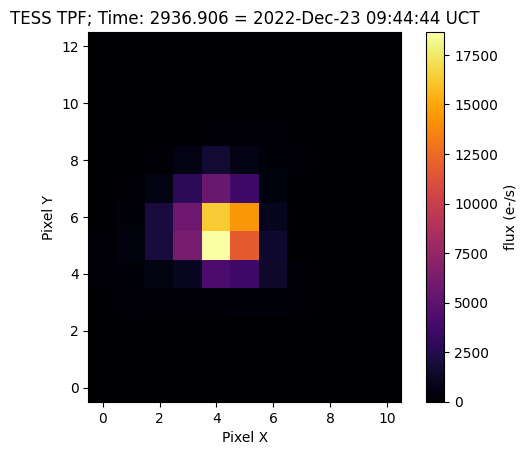

In [7]:
f2 = fits.open(filename_2)
f2.info()
HDU2 = f2['PIXELS'].header
TIME = f2['PIXELS'].data['TIME']
FLUX = f2['PIXELS'].data['FLUX']
FLUX_BKG = f2['PIXELS'].data['FLUX_BKG']

#type(FLUX) #ndarray
#FLUX.shape #(18494, 13, 11) 18494 images

image_data_2 = FLUX[4] #fifth image
image_time = TIME[4] #2936.906 (TJD)

#The image was taken at time: 2936.9060567707315 TJD (TESS Julian Date)
#TJD = JD - 2457000 (JD = Julian Date)
#JD time the image was taken = 2936.9060567707315 + 2457000 = 2459936.90606
#Using NASA's Julian Date to Gregorian Calender date Converter, "https://ssd.jpl.nasa.gov/tools/jdc/#/jd"
#The image was taken on 2022-Dec-23 09:44:44 UCT

plt.imshow(image_data_2, cmap = cm.inferno, origin='lower')
plt.colorbar(label='flux (e-/s)')
plt.title(f"TESS TPF; Time: {image_time:.3f} = 2022-Dec-23 09:44:44 UCT")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.show()

Mean background flux: 82.34 e-/s
Sigma background flux: 7.63e-06 e-/s


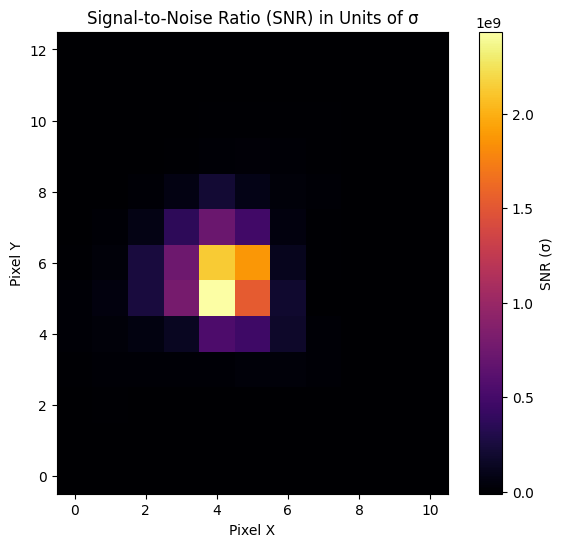

The brightest pixel is at y = 5, x = y = 5;
the SNR of the brightest pixel is: 2433580800.0


In [8]:
flux_bkg = FLUX_BKG[4]

#Calculate the average background and noise (sigma)
average_background = np.mean(flux_bkg)
sigma_background = np.std(flux_bkg)
print(f"Mean background flux: {average_background:.2f} e-/s")
print(f"Sigma background flux: {sigma_background:.2e} e-/s")

#Calculate the signal-to-noise ratio (SNR) in each pixel
SNR = (image_data_2 - flux_bkg) / sigma_background

#Re-plot the image in units of sigma
plt.figure(figsize=(8, 6))
plt.imshow(SNR, cmap=cm.inferno, origin='lower')
plt.colorbar(label='SNR (σ)')
plt.title("Signal-to-Noise Ratio (SNR) in Units of σ")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.show()

#Find the SNR of the brightest pixel
brightest_pixel_index = np.unravel_index(np.argmax(image_data_2), image_data_2.shape)
brightest_pixel_snr = SNR[brightest_pixel_index]
print(f"The brightest pixel is at y = {brightest_pixel_index[0]}, x = y = {brightest_pixel_index[0]};\nthe SNR of the brightest pixel is: {brightest_pixel_snr}")
#The SNR of the brightest pixel @ (4,5) is: 2433580800.0

b. Get the aperture from the HDU


In order to turn these images into a light curve, we want to sum up all of the pixels that are receiving photons from the star, KELT 24. Luckily, the Target Pixel File comes with an aperture that tells us which pixels those are!


First in order to convert the values in the aperture image to the form we want them in, use the following function.

If you want more information about why this is necessary, you can read section 4.2.3 and section 6.2 of the TESS Data Products documentLinks to an external site.

```python
def get_aperture(mask_image): 
	 '''Convert the aperture values to a useable form
	 Parameters
	 ----------
	 mask_image: 11x13 array
        	 image from the "APERTURE" HDU of a TESS Target Pixel File in its original form 
        	 (holds more data than just the aperture that we want) 
	 aperture: 11x13 array
        	 simplified aperture image; "star" pixels = 1, background pixels = 0.
	 ''' 
	 aperture = np.zeros(mask_image.shape) 
	 for i, row in enumerate(mask_image): 
	 	 for j, pix in enumerate(row): 
	 	 	this_bit = np.binary_repr(pix) 
	 	 	if this_bit[-2] == '1':
	 	 	 	aperture[i,j] = 1
	 return aperture
```
Use the function to get the aperture and then plot that aperture


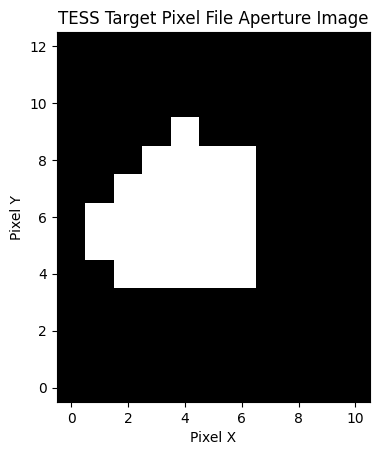

In [9]:
import matplotlib.patches as mpatches

#get_aperture function given to us
def get_aperture(mask_image): 
    '''Convert the aperture values to a useable form
    Parameters
    ----------
    mask_image: 11x13 array
        image from the "APERTURE" HDU of a TESS Target Pixel File in its original form 
        (holds more data than just the aperture that we want) 
    aperture: 11x13 array
        simplified aperture image; "star" pixels = 1, background pixels = 0.
    ''' 
    aperture = np.zeros(mask_image.shape) 
    for i, row in enumerate(mask_image): 
        for j, pix in enumerate(row): 
            this_bit = np.binary_repr(pix) 
            if this_bit[-2] == '1':
                aperture[i,j] = 1
    return aperture

image_aperture = get_aperture(f2['APERTURE'].data) #get apature image from 'APERTURE' HDU

# Plot the image
fig, ax = plt.subplots()
img = ax.imshow(image_aperture, cmap=cm.grey, origin='lower')

plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.title("TESS Target Pixel File Aperture Image")
plt.show()



plt.show()

3. Creating a light curve from TESS Target Pixel Files:

To get the stellar flux, sum the counts from the "star" pixels in each image

End result should be a 1D array the same size as your time array

Plot flux vs time

In [10]:
stellar_flux = []
#print(FLUX.shape)
for flux_imgs in FLUX:
    flux_sum = np.sum(flux_imgs * image_aperture) #multiply counts by aperture; undesired pixels will be multiplied by 0
    stellar_flux.append(flux_sum)

stellar_flux = np.array(stellar_flux) #convert the list to a numpy array
#stellar_flux.shape #(18494,)

stellar_flux.shape == TIME.shape #True


True

Text(0, 0.5, 'Stellar Flux (e-/s)')

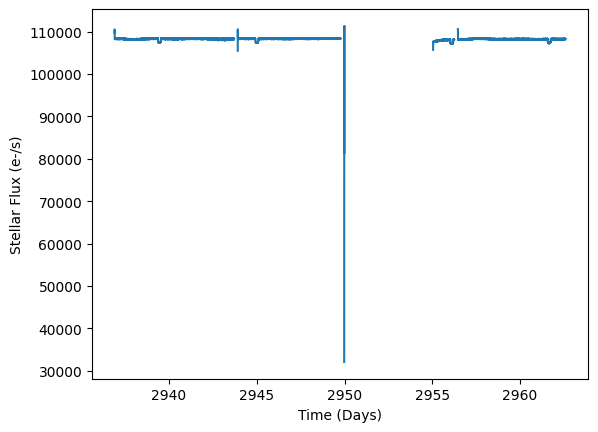

In [11]:
#Plotting flix vs time
plt.plot(TIME, stellar_flux)
plt.xlabel("Time (Days)")
plt.ylabel("Stellar Flux (e-/s)")

4. Using "sigma-clipping" get rid of outliers 

a. Write the sigma clipping function

We're going to write a function to "sigma-clip" the data. In other words, getting rid of all of the data points that are greater than n standard deviations away from the median flux. There are functions in astropy and scipy that will do this for us, but it will be beneficial to write our own to understand how this works: 


Define a new function sigma_clip

There should be four input parameters: 

times - Array of times

fluxes - Array of flux values

n_lower - number of $\sigma$ below the median that we want to clip out 

n_upper - number of $\sigma$ above the median that we want to clip out

And two output parameters:

clipped_times - Array of times of the "clipped" data

clipped_fluxes - Array of fluxes of the "clipped" data

"Clipping" the data is shorthand for finding the data where the flux is between $F_\mathrm{avg} - n_\mathrm{lower}\, \sigma$ and $F_\mathrm{avg} + n_\mathrm{upper}\, \sigma$

This function is iterative, which means that after clipping the data once, you should re-compute $\sigma$ and attempt to clip the data again with the new value until the clipping does not remove anymore data.

Use np.nanstd to calculate $\sigma$

Hint: this is a while loop situation

In [12]:
import numpy as np

def sigma_clip(times, fluxes, n_lower, n_upper):
    """
    Perform sigma clipping on the given data.

    Parameters
    ----------
    times: numpy.ndarray
        Array of times.
    fluxes: numpy.ndarray
        Array of flux values.
    n_lower: float
        Number of standard deviations below the median to clip.
    n_upper: float 
        Number of standard deviations above the median to clip.

    Returns:
    Clipped times: numpy.ndarray
        The times array with outliers removed.
    Clipped fluxes: numpy.ndarray
        The stellar_fluxes array with outliers removed.
    """
    clipped_times = times.copy()
    clipped_fluxes = fluxes.copy()

    while True:
        # Remove NaNs before computing statistics
        valid_mask = np.logical_not(np.isnan(clipped_fluxes)) #The mask is onlt valud if the flux is not NaN
        if np.sum(valid_mask) == 0:  #uf no valid data remains, break
            print("All values clipped away! Returning empty arrays.")
            return np.array([]), np.array([])

        clipped_times = clipped_times[valid_mask]
        clipped_fluxes = clipped_fluxes[valid_mask]

        median_flux = np.nanmedian(clipped_fluxes)  #ignore NaNs
        sigma_flux = np.nanstd(clipped_fluxes)  # ignore NaNs
        
        lower_bound = median_flux - n_lower * sigma_flux
        upper_bound = median_flux + n_upper * sigma_flux

        #Debugging print statements
        #print(f"Median: {median_flux}, Sigma: {sigma_flux}")
        #print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

        mask = (clipped_fluxes >= lower_bound) & (clipped_fluxes <= upper_bound)
        
        if np.all(mask):  # Stop if no more values are removed
            break
        
        clipped_times = clipped_times[mask]
        clipped_fluxes = clipped_fluxes[mask]
    
    return clipped_times, clipped_fluxes


b. Applying the function to our data:

Plot the subset of the data that is within $1\sigma$ of the median flux value.

Repeat the above with $3\sigma$, $5\sigma$, and $10\sigma$

What are appropriate bounds to “sigma clip” the data?

These bounds should remove outlier data without clipping out the transits

Note that you can choose different “sigma” values for the upper and lower bounds.

You may want to zoom in on a transit using plt.xlim in order to ensure that the the bottom of your transit isn't being cut off by the sigma-clipping you choose

Plot your final clipped light curve using a line with linewidth=1


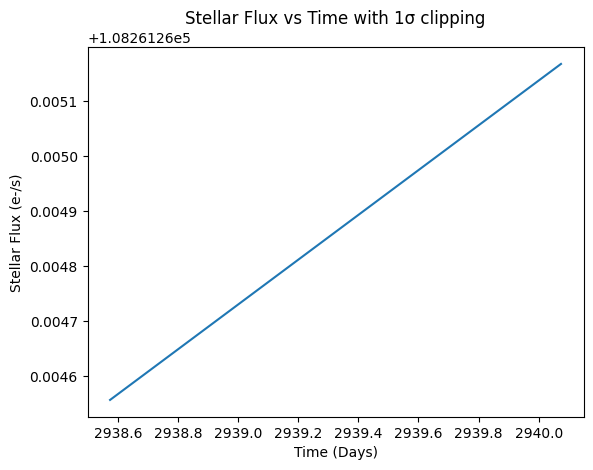

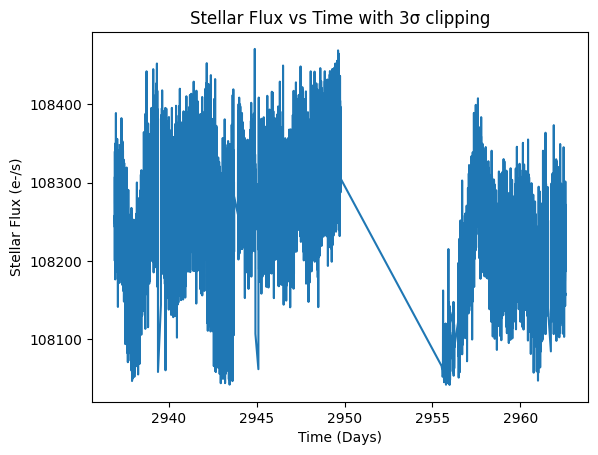

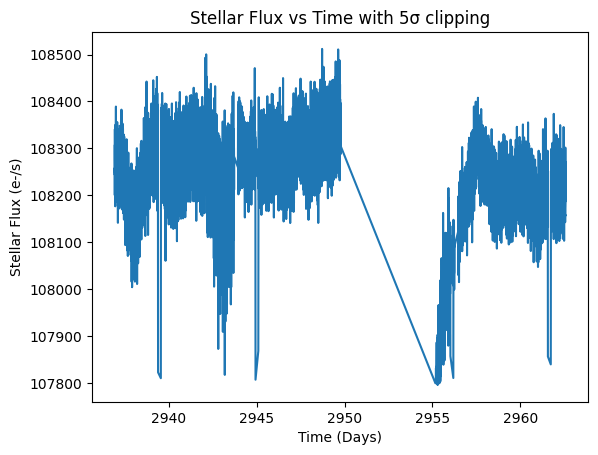

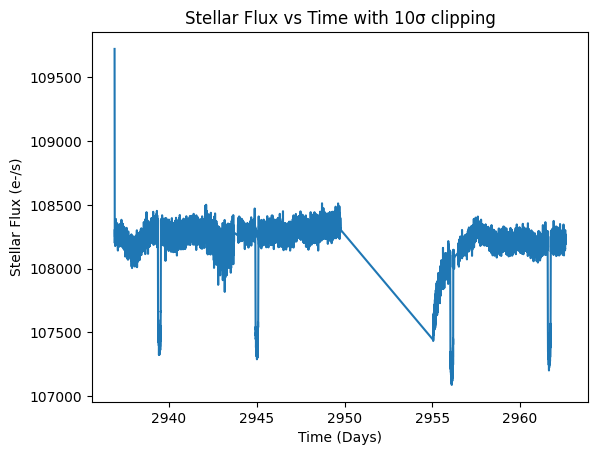

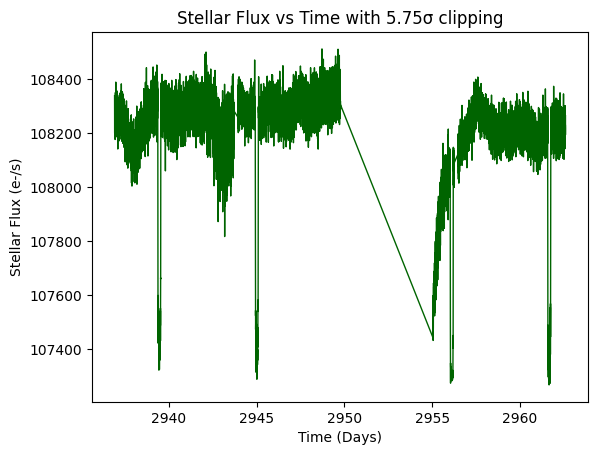

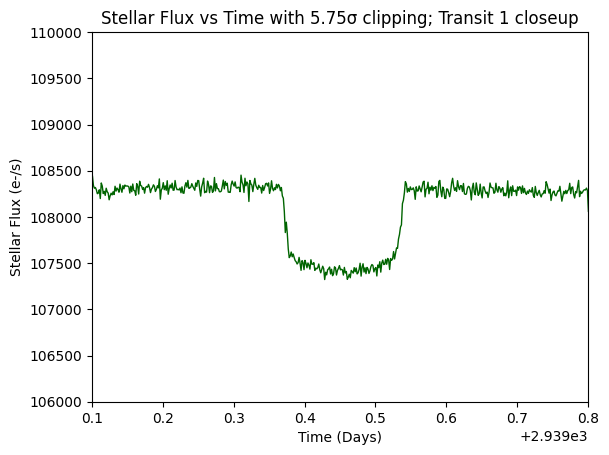

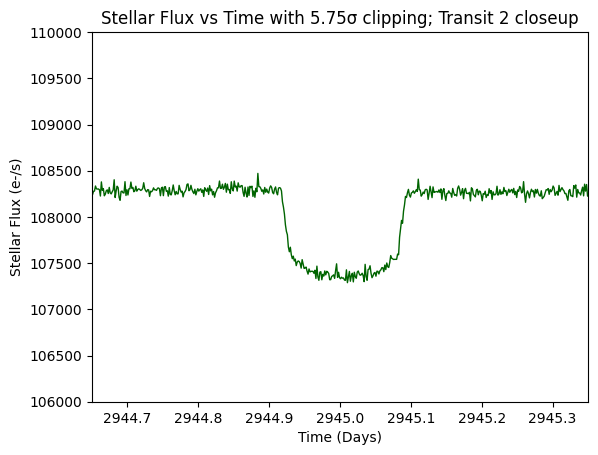

In [13]:
clipped_times, clipped_fluxes = sigma_clip(TIME, stellar_flux, 1, 1)
plt.plot(clipped_times, clipped_fluxes)
plt.xlabel("Time (Days)")
plt.ylabel("Stellar Flux (e-/s)")
plt.title("Stellar Flux vs Time with 1σ clipping")
plt.show()

clipped_times, clipped_fluxes = sigma_clip(TIME, stellar_flux, 3, 3)
plt.plot(clipped_times, clipped_fluxes)
plt.xlabel("Time (Days)")
plt.ylabel("Stellar Flux (e-/s)")
plt.title("Stellar Flux vs Time with 3σ clipping")
plt.show()

clipped_times, clipped_fluxes = sigma_clip(TIME, stellar_flux, 5, 5)
plt.plot(clipped_times, clipped_fluxes)
plt.xlabel("Time (Days)")
plt.ylabel("Stellar Flux (e-/s)")
plt.title("Stellar Flux vs Time with 5σ clipping")
plt.show()

clipped_times, clipped_fluxes = sigma_clip(TIME, stellar_flux, 10, 10)
plt.plot(clipped_times, clipped_fluxes)
plt.xlabel("Time (Days)")
plt.ylabel("Stellar Flux (e-/s)")
plt.title("Stellar Flux vs Time with 10σ clipping")
plt.show()

# Sigma 5.75 seems to be a good value for clipping; the transits are clearly visible unlike 1, 3, and even 5σ without keeping outliers like 10σ
clipped_times, clipped_fluxes = sigma_clip(TIME, stellar_flux, 5.75, 5.75)
plt.plot(clipped_times, clipped_fluxes, 'darkgreen', linewidth=1, )
plt.xlabel("Time (Days)")
plt.ylabel("Stellar Flux (e-/s)")
plt.title("Stellar Flux vs Time with 5.75σ clipping")
plt.show()

#focusing on the first transit
clipped_times, clipped_fluxes = sigma_clip(TIME, stellar_flux, 5.75, 5.75)
plt.plot(clipped_times, clipped_fluxes, 'darkgreen', linewidth=1, )
plt.xlabel("Time (Days)")
plt.ylabel("Stellar Flux (e-/s)")
plt.title("Stellar Flux vs Time with 5.75σ clipping; Transit 1 closeup")
plt.xlim(2939.10, 2939.8) # Looking at first transit
plt.ylim(106000, 110000)
plt.show()

#focusing on the second transit
clipped_times, clipped_fluxes = sigma_clip(TIME, stellar_flux, 5.75, 5.75)
plt.plot(clipped_times, clipped_fluxes, 'darkgreen', linewidth=1, )
plt.xlabel("Time (Days)")
plt.ylabel("Stellar Flux (e-/s)")
plt.title("Stellar Flux vs Time with 5.75σ clipping; Transit 2 closeup")
plt.xlim(2944.65, 2945.35) # Looking at first transit
plt.ylim(106000, 110000)
plt.show()

5. Looking at the transit data, what can we learn?

Estimate the following values by eye

-Period in days

-Transit depth, as a fraction of total flux

-Transit duration in hours

Explain in comments or markdown cells the processes you use to estimate these quantities


====================================================


ANSWERS:

- Period in days:

Looking at the final two graphs, the first transit happens at $~2939.45$ days while the second transit happens at $~2945.00$ days.

**This gives us a orbital period of $ P \approx 2945.00 - 2939.45$ days $ = 5.55 $ days.**

=============

- Transit Depth, as a fraction of total flux:

Both transits have a background flux of ~108300 e-/s and dip to a minimum of ~107300 e-/s.

**This gives up a transit depth of $\delta \approx \frac{1000 e-/s}{108300 e-/s} = .0092$ a decrease of flux by $0.92\%$.**

=============

- Transit Duration in hours:
 
 The first transit lasts from ~2939.35 days to ~2939.55 days; ~0.20 days long
 The second transit lasts from ~2944.9 days to ~2945.1 days; also ~0.20 days long

**A transit duration of ~0.20 days = $ t \approx 0.20\ days \times 24\frac{hrs}{day} = ~4.8\ hrs $**


====================================================

Tip: It will help to normalize the light curve by dividing by the median flux

Plot one transit plus or minus 0.1 days on either side, with normalized flux on the y-axis and time in days on the x-axis

Use '.' to plot the data as small circles as shown below e.g. plt.(xvalues, yvalues, '.') 

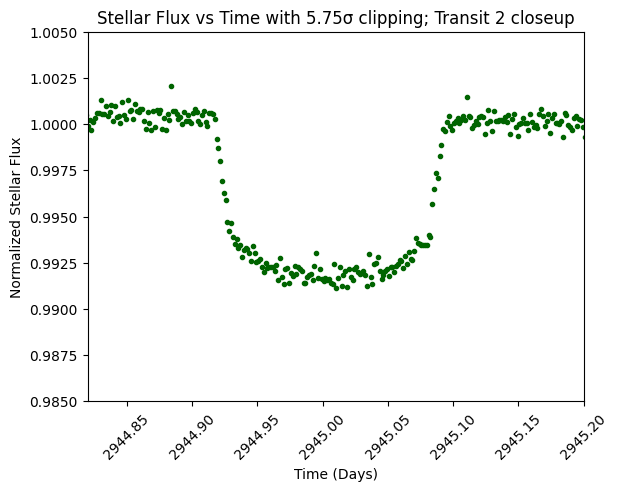

In [74]:
# Focusing on the second transit
clipped_times, clipped_fluxes = sigma_clip(TIME, stellar_flux, 5.75, 5.75)

normalized_flux = clipped_fluxes / np.median(clipped_fluxes)
est_transit_time = 2945.0

plt.plot(clipped_times, normalized_flux, '.', color='darkgreen')
plt.xlabel("Time (Days)")
plt.ylabel("Normalized Stellar Flux")
plt.title("Stellar Flux vs Time with 5.75σ clipping; Transit 2 closeup")
plt.xlim(2944.82, 2945.2)  # Looking at the second transit
plt.ylim(0.985, 1.005)

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)

plt.show()

One thing we can easily calculate from transit data is the planet's radius:

$\delta = \left(\frac{R_p}{R_*}\right)^2$

where $\delta$ is the transit depth, $R_*$ is the stellar radius, and $R_p$ is the planet radius. The star KELT-24 has a radius of $R_* \approx 1.5 \text{R}_\odot$.

Compute the radius of KELT-24b in Jupiter radii (Note: $1 R_\odot \approx 10 R_\mathrm{Jup}$)

ANSWER

$\delta = \left(\frac{R_p}{R_*}\right)^2\\$

$\sqrt{\delta} = \frac{R_p}{R_*}\\$

$R_* \times \sqrt{\delta} = R_p\\$

$R_p =1.5 \text{R}_\odot \times \sqrt{0.0092}\ \ \ \|\ \ 1 \text{R}_\odot \approx 10 R_\mathrm{Jup}\\$

$R_p =1.5 \times 10 R_\mathrm{Jup} \times \sqrt{0.0092} = 0.1385R_\mathrm{Jup} \approx 0.14R_\mathrm{Jup}$

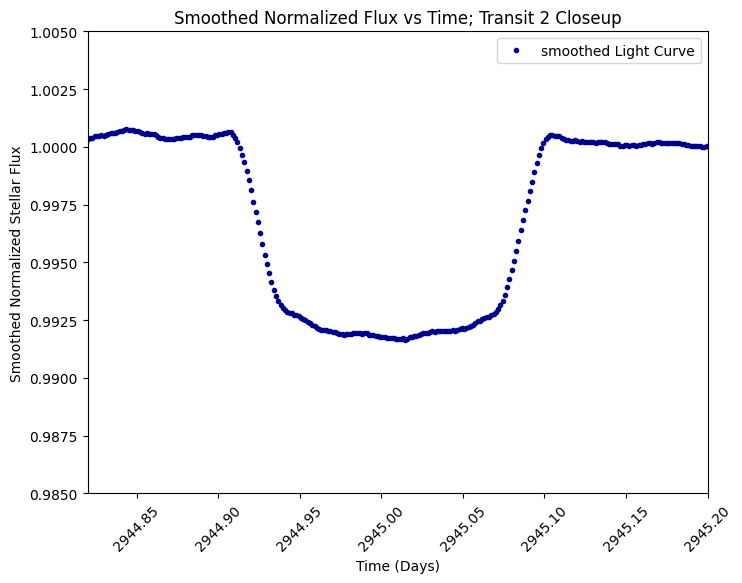

In [108]:
#Smoorthing the light curve to remove correlated noise
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter to remove correlated noise
smoothed_flux = savgol_filter(normalized_flux, window_length=31, polyorder=3)

# Plot the smoothed  light curve focusing on the second transit
plt.figure(figsize=(8, 6))
plt.plot(clipped_times, smoothed_flux, '.', color='darkblue', label='smoothed Light Curve')
plt.xlabel("Time (Days)")
plt.ylabel("Smoothed Normalized Stellar Flux")
plt.title("Smoothed Normalized Flux vs Time; Transit 2 Closeup")
plt.xlim(2944.82, 2945.2)  # Focus on the second transit centring the trough of the transit
plt.ylim(0.985, 1.005)

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.legend()
plt.show()